In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.8.2'

**Carregamento da base de dados**


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


**Visualização dos dados**

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

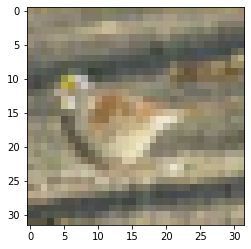

In [ ]:
i = random.randint(0,60000)
plt.imshow(X_train[i], cmap='gray')

In [ ]:
label = y_train[i]
label

array([7], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


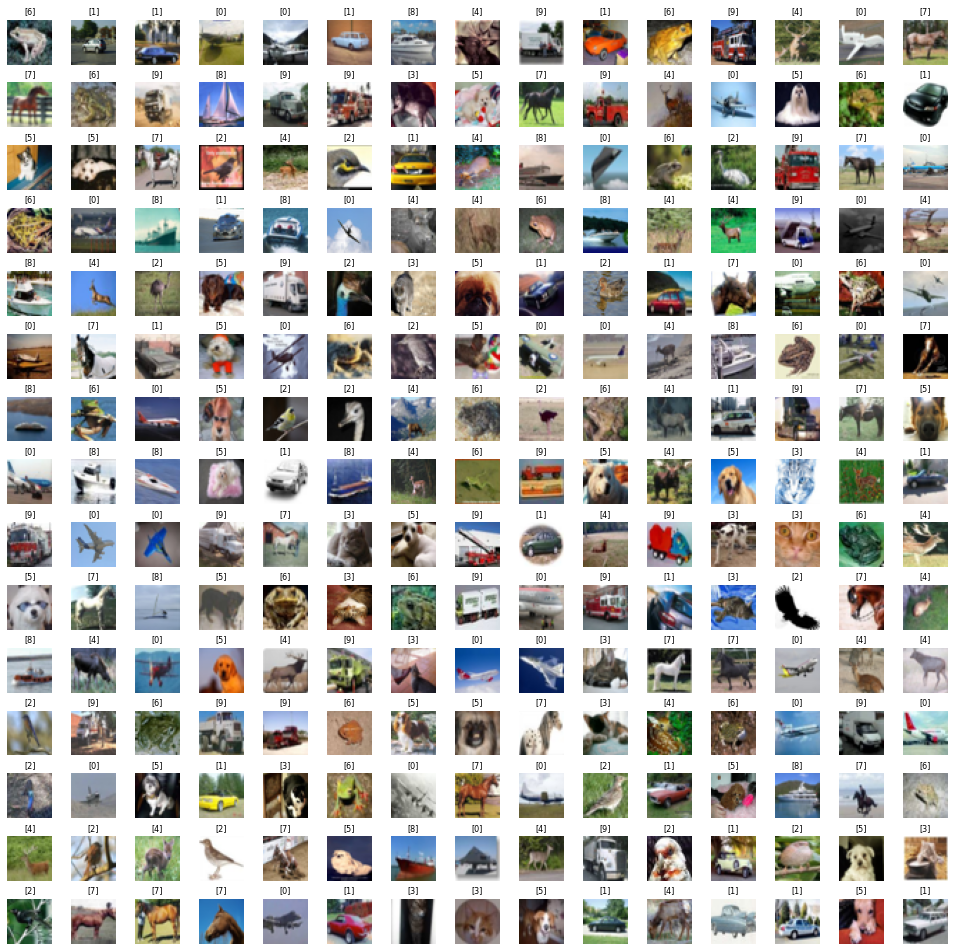

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)



**Adição de ruído nas imagens**

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
added_noise = np.random.randn(*(32,32,3))

In [ ]:
added_noise.shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


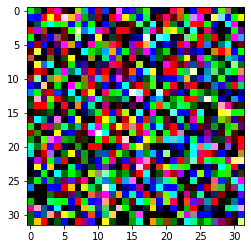

In [ ]:
plt.imshow(added_noise)

In [5]:
noise_factor = 0.3 #quantidade de ruído na imagem
added_noise = noise_factor * np.random.randn(*(32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


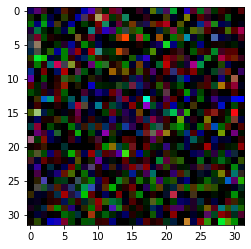

In [ ]:
plt.imshow(added_noise)

In [6]:
noise_factor = 0.2
sample_image = X_train[10]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


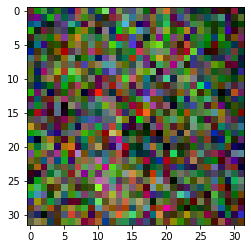

In [ ]:
plt.imshow(noisy_sample_image, cmap = 'gray')

In [ ]:
noisy_sample_image.max()

0.9178146798034668

In [ ]:
noisy_sample_image.min()

-0.5411528988173793

In [7]:
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)

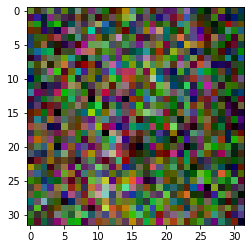

In [ ]:
plt.imshow(noisy_sample_image, cmap = 'gray')

In [36]:
X_train_noisy = []
noise_factor = 0.1

for sample_image in X_train:
    sample_image_noisy = sample_image + noise_factor * np.random.randn(*(32,32,3))
    sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
    X_train_noisy.append(sample_image_noisy)

In [ ]:
type(X_train_noisy)

list

In [37]:
X_train_noisy = np.array(X_train_noisy)
type(X_train_noisy)

numpy.ndarray

In [ ]:
X_train_noisy.shape

(50000, 32, 32, 3)

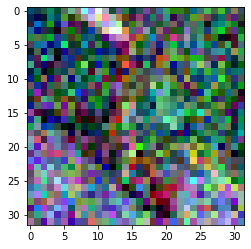

In [ ]:
plt.imshow(X_train_noisy[50], cmap = 'gray')

In [38]:
X_test_noisy = []
noise_factor = 0.2

for sample_image in X_test:
    sample_image_noisy = sample_image + noise_factor * np.random.randn(*(32,32,3))
    sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
    X_test_noisy.append(sample_image_noisy)

In [39]:
X_test_noisy = np.array(X_test_noisy)
type(X_test_noisy)

numpy.ndarray

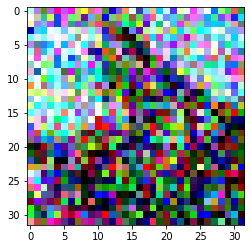

In [ ]:
plt.imshow(X_test_noisy[50], cmap = 'gray')

**Criação e treinamento do modelo**

In [23]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))

#Encoded image (Code Layer)
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding='same')) 

#Decoder 
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2,2))) 

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2,2))) 

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2,2))) 

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding='same'))

In [40]:
autoencoder = tf.keras.models.Sequential()

#Encoder                               #número de filtros, tamanho do filtro
#Redução da dimensionalidade
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', input_shape=(32,32,3)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

#Encoded Image
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))


#Decoder
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(16, (3,3), strides=1, padding='same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(3, (3,3), strides=1, padding='same', activation = 'sigmoid'))

autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 16, 16, 8)       

In [41]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [42]:
autoencoder.fit(X_train_noisy.reshape(-1, 32,32,3),
                X_train.reshape(-1, 32,32,3),
                epochs = 5,
                batch_size=200)

Epoch 1/5
250/250 [==============================] - 69s 273ms/step - loss: 0.5797
Epoch 2/5
250/250 [==============================] - 69s 276ms/step - loss: 0.5661
Epoch 3/5
250/250 [==============================] - 68s 271ms/step - loss: 0.5648
Epoch 4/5
250/250 [==============================] - 68s 271ms/step - loss: 1.3707
Epoch 5/5
250/250 [==============================] - 69s 275ms/step - loss: 0.5911


**Avaliação do Modelo**

In [43]:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 32, 32, 3))

In [44]:
denoised_images.shape

(15, 32, 32, 3)

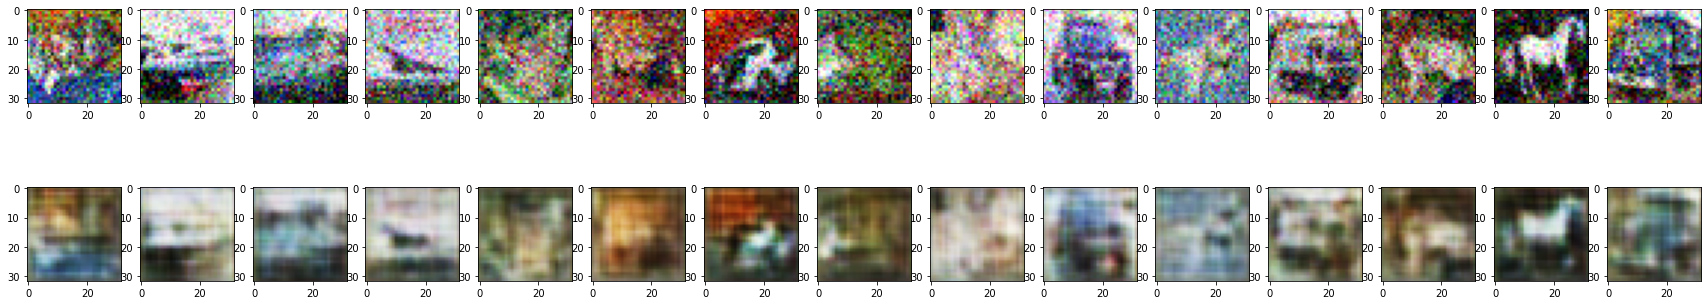

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((32, 32, 3)), cmap='gray')